### Social_Networks_Ads using ANN

Goal:-

1. The main aim of this project is to predict whether the user has purchased the product or not using Artificial Neural Networks.

### Steps used in this Project:-

1. Import all the necessary Libraries

2. Load Dataset

3. Perform Data Preprocessing 

4. Select Features (X) and Target (y)

5. Split Dataset into Train & Test

6. Feature Scaling (Standardization)

7. Build the ANN Model

8. Compile the ANN

9. Train the ANN

10. Evaluate the Model

11. Plot the training curves

12. Make Predictions

13. Take a sample data and check whether the customer will purchase the product or not

### Step 1: Import all the necessary Libraries

In [829]:
import   numpy              as  np
import   pandas             as  pd
import   matplotlib.pyplot  as  plt
import   seaborn            as  sns

from     sklearn.model_selection  import  train_test_split
from     sklearn.preprocessing    import  StandardScaler


from     tensorflow.keras.models    import  Sequential
from     tensorflow.keras.layers    import  Dense, Dropout, BatchNormalization
from     tensorflow.keras.callbacks import  EarlyStopping, ReduceLROnPlateau

### Step 2:  Load Dataset

In [830]:
df = pd.read_csv('Social_Network_Ads.csv')

In [831]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### OBSERVATIONS:

1. The dataset contains the list of all the customers who have purchased the product or not.


   Inputs are:---

    (a.)   UserID, Gender, Age, EstimatedSalary


    Output is:----

    (a.)  Purchased

### Step 3: Perform Data Preprocessing 

In [832]:
### Remove all the unwanted columns from the dataset

df.drop(columns=['User ID'],axis=1,inplace=True)

In [833]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [834]:
### Perform Label Encoding on 'Gender' Column

df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [835]:
from sklearn.preprocessing import LabelEncoder

### Create an object for LabelEncoder

label = LabelEncoder()


df['Gender'] = label.fit_transform(df['Gender'])

In [836]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


### OBSERVATIONS:

1. All the categorical values of the 'Gender' column has been converted into the numerical values using Label Encoding technique.

### Step 4: Select Features (X) and Target (y)

In [837]:
X = df.drop(columns='Purchased', axis=1)    ### Independent feature

Y = df['Purchased']                         ### Dependent feature

In [838]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [839]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Step 5: Split Dataset into Train & Test

In [840]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [841]:
X_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [842]:
X_test

,Gender,Age,EstimatedSalary
209,0,46,22000
280,0,59,88000
33,0,28,44000
210,0,48,96000
93,0,29,28000
...,...,...,...
246,0,35,50000
227,1,56,133000
369,0,54,26000
176,0,35,47000


In [843]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (320, 3)
Shape of the input testing  data is: (80, 3)


In [844]:
Y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [845]:
Y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [846]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (320,)
Shape of the output testing  data is: (80,)


### Step 6: Feature Scaling (Standardization)

In [847]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### Transform the inputs in one range

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [848]:
X_train_scaled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [849]:
X_test_scaled

array([[-1.        ,  0.79753468, -1.40447546],
       [-1.        ,  2.07309956,  0.51542886],
       [-1.        , -0.96863208, -0.76450736],
       [-1.        ,  0.99377543,  0.74814454],
       [-1.        , -0.87051171, -1.22993871],
       [-1.        , -0.77239133, -0.24089709],
       [-1.        ,  0.89565505,  1.06812859],
       [-1.        , -0.87051171,  0.36998156],
       [ 1.        ,  0.20881242,  0.13726589],
       [ 1.        ,  0.40505317, -0.15362871],
       [-1.        , -0.28178945, -0.15362871],
       [-1.        ,  1.4843773 , -1.05540195],
       [-1.        , -1.45923396, -0.64814952],
       [-1.        , -1.75359508, -1.37538601],
       [ 1.        , -0.77239133,  0.4863394 ],
       [ 1.        , -0.28178945,  1.09721805],
       [-1.        ,  1.38625693, -0.93904411],
       [-1.        ,  0.79753468,  0.10817643],
       [ 1.        ,  0.11069205, -0.82268628],
       [ 1.        ,  1.77873843, -0.29907601],
       [-1.        , -1.55735433, -1.259

### Step 7: Build the ANN Model

In [850]:
### Create an object for ANN Model
model = Sequential(
    [
        ### Create the first dense layer for ANN Model
        Dense(8, activation = 'relu', input_dim = X_train.shape[1]),
        BatchNormalization()                                       ,
        Dropout(0.3)                                               ,

        ### Create the second dense layer for ANN Model
        Dense(4, activation = 'relu')                              ,
        BatchNormalization()                                       ,
        Dropout(0.15)                                              ,

        ### Create the output layer for ANN Model
        Dense(1, activation = 'sigmoid')
    ]
)


C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 8: Compile the ANN

In [851]:
model.compile(
    optimizer = 'adam'                            ,
    loss      = 'binary_crossentropy'             ,
    metrics   = ['accuracy']
)

### Step 9: Train the ANN

In [852]:
er = EarlyStopping(
    monitor      =       'val_loss'                ,
    patience     =          8                      ,
    restore_best_weights = True
)


rdr = ReduceLROnPlateau(
    monitor    =        'val_loss'                ,
    factor     =           0.5                    ,
    patience   =            4                     ,
    verbose    =            1
)

In [853]:
history = model.fit(
    X_train_scaled                                     ,
    Y_train                                            ,
    epochs           =     100                         ,
    batch_size       =     64                          ,
    validation_split =     0.2                         ,
    callbacks        =    [er, rdr]                    ,
    verbose          =      2
)

Epoch 1/100
4/4 - 1s - 327ms/step - accuracy: 0.5508 - loss: 0.8484 - val_accuracy: 0.3125 - val_loss: 0.8470 - learning_rate: 1.0000e-03
Epoch 2/100
4/4 - 0s - 19ms/step - accuracy: 0.5391 - loss: 0.8427 - val_accuracy: 0.2969 - val_loss: 0.8228 - learning_rate: 1.0000e-03
Epoch 3/100
4/4 - 0s - 20ms/step - accuracy: 0.5586 - loss: 0.7739 - val_accuracy: 0.2656 - val_loss: 0.7993 - learning_rate: 1.0000e-03
Epoch 4/100
4/4 - 0s - 19ms/step - accuracy: 0.5977 - loss: 0.7230 - val_accuracy: 0.2344 - val_loss: 0.7787 - learning_rate: 1.0000e-03
Epoch 5/100
4/4 - 0s - 20ms/step - accuracy: 0.5820 - loss: 0.7679 - val_accuracy: 0.3594 - val_loss: 0.7590 - learning_rate: 1.0000e-03
Epoch 6/100
4/4 - 0s - 20ms/step - accuracy: 0.5781 - loss: 0.7419 - val_accuracy: 0.4219 - val_loss: 0.7405 - learning_rate: 1.0000e-03
Epoch 7/100
4/4 - 0s - 19ms/step - accuracy: 0.6289 - loss: 0.6819 - val_accuracy: 0.4688 - val_loss: 0.7243 - learning_rate: 1.0000e-03
Epoch 8/100
4/4 - 0s - 19ms/step - accur

### OBSERVATIONS:

1. The accuracy of the model has increase a lot and the loss value has reduced. So the model has been trained well.

### Step 10: Evaluate the Model

In [854]:
loss, acc = model.evaluate(X_test_scaled, Y_test, verbose=0)

print("Loss Function is:", loss)

print("Test Accuracy is:", acc)

Loss Function is: 0.23467612266540527
Test Accuracy is: 0.925000011920929


### OBSERVATIONS:

1. The test accuracy of the model is very high

2. The loss function is very low

So the model is woking completely fine.

### Step 11: Plot the training curves

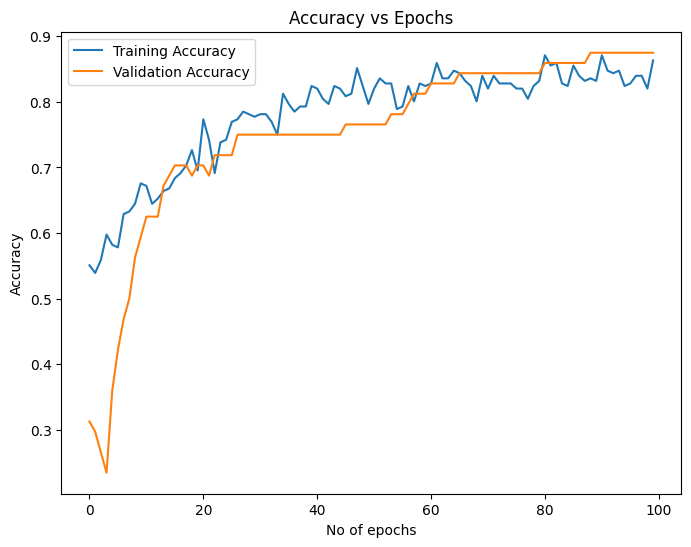

In [855]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'],     label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### OBSERVATIONS:

1. With the increase in the number of epochs, the training and validation increases and then after some times the graph becomes stable.

### Step 12:  Make Predictions

In [856]:
Y_pred = model.predict(X_test_scaled)

Y_pred = (Y_pred > 0.5)
print(Y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]]


### Step 13: Take a sample data and check whether the customer will purchase the product or not

In [857]:
sample = X_test.iloc[[0]]

print(sample)

     Gender  Age  EstimatedSalary
209       0   46            22000


In [858]:
### Transform the data in one range
transformed_data = sc.transform(sample)

In [859]:
transformed_data

array([[-1.        ,  0.79753468, -1.40447546]])

In [860]:
### predict the data

predictions = model.predict(transformed_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [861]:
predictions = predictions.astype(int)

In [862]:
predictions

array([[0]])

In [863]:
if(predictions > 0.5):
    print("Customer will purchase the product:(1)")
else:
    print("Customer will not purchase the product:(0)")

Customer will not purchase the product:(0)
